Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFBertForSequenceClassification
import tensorflow.compat.v1 as tf

### Reading and Preprocessing the Data

In [5]:
comments_df = pd.read_csv("comments.csv")
comments_df.drop("Unnamed: 0",axis=1,inplace=True)
comments_df.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


***Video ID:*** *The Video Identifier.*

***Comment:*** *The comment text.*

***Likes:*** *The number of likes the comment received.*

***Sentiment:*** *The sentiment of the comment. A value of 0 represents a negative sentiment, while values of 1 or 2 represent neutral and positive sentiments respectively.*

In [6]:
videos_df = pd.read_csv("videos-stats.csv")
videos_df.drop("Unnamed: 0",axis=1,inplace=True)
videos_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


**Title:** *Video Title.*

**Video ID:** *The Video Identifier.*

**Published At:** *The date the video was published in YYYY-MM-DD.*

**Keyword:** *The keyword associated with the video.*

**Likes:** *The number of likes the video received. If this value is -1, the likes are not publicly visible.*

**Comments:** *The number of comments the video has. If this value is -1, the video creator has disabled comments.*

**Views:** *The number of views the video got.*


In [7]:
merged_df = pd.merge(videos_df, comments_df, on='Video ID')
merged_df.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         18645 non-null  object 
 1   Video ID      18645 non-null  object 
 2   Published At  18645 non-null  object 
 3   Keyword       18645 non-null  object 
 4   Likes_x       18625 non-null  float64
 5   Comments      18625 non-null  float64
 6   Views         18625 non-null  float64
 7   Comment       18644 non-null  object 
 8   Likes_y       18645 non-null  float64
 9   Sentiment     18645 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [9]:
nan_counts = merged_df.isnull().sum()
print(nan_counts)

Title            0
Video ID         0
Published At     0
Keyword          0
Likes_x         20
Comments        20
Views           20
Comment          1
Likes_y          0
Sentiment        0
dtype: int64


In [10]:
rows_with_nan = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nan

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
9939,MUKBANG 새우치킨 사이드 전메뉴 먹방! Korean Fried Chicken ...,bvkk3UdlfA4,2022-08-23,mukbang,2817.0,59.0,286228.0,NaN,1.0,1.0
18625,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,Machine learning is an incredibly powerful num...,38.0,2.0
18626,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,You have the best way to describe what Machine...,4.0,2.0
18627,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,Great introduction. Question: is it always the...,1.0,2.0
18628,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,"I love the way you explained, plus the diversi...",2.0,2.0
18629,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,"AI is already here, and that is not such a bad...",0.0,2.0
18630,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,Best explanation of machine learning🔥🔥,0.0,2.0
18631,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,Awesome! Succinct :-) Very effective for a new...,3.0,2.0
18632,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,well explanation. love it,2.0,2.0
18633,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN,Great animation.keep it up.,1.0,2.0


Most of nan values is machine learning videos, so checking if removing them will effect machine learning videos' representation in dataset

In [11]:
ml_videos = merged_df[merged_df['Keyword'] == 'machine learning']
ml_videos.shape

(513, 10)

There is still enough videos for machine learning keyword, so drop them.

In [12]:
merged_df.dropna(inplace=True)

In [13]:
merged_df['Title'] = merged_df['Title'].astype('str')
merged_df['Video ID'] = merged_df['Video ID'].astype('str')
merged_df['Keyword'] = merged_df['Keyword'].astype('str')
merged_df['Comment'] = merged_df['Comment'].astype('str')

merged_df['Likes_x'] = merged_df['Likes_x'].astype('int64')
merged_df['Comments'] = merged_df['Comments'].astype('int64')
merged_df['Views'] = merged_df['Views'].astype('int64')
merged_df['Likes_y'] = merged_df['Likes_y'].astype('int64')
merged_df['Sentiment'] = merged_df['Sentiment'].astype('int64')

merged_df['Published At'] = pd.to_datetime(merged_df['Published At'], format='%Y-%m-%d')

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18624 entries, 0 to 18624
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         18624 non-null  object        
 1   Video ID      18624 non-null  object        
 2   Published At  18624 non-null  datetime64[ns]
 3   Keyword       18624 non-null  object        
 4   Likes_x       18624 non-null  int64         
 5   Comments      18624 non-null  int64         
 6   Views         18624 non-null  int64         
 7   Comment       18624 non-null  object        
 8   Likes_y       18624 non-null  int64         
 9   Sentiment     18624 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.6+ MB


In [15]:
merged_df.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Let's not forget that Apple Pay in 2014 requir...,95,1
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Here in NZ 50% of retailers don’t even have co...,19,0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,I will forever acknowledge this channel with t...,161,2
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Whenever I go to a place that doesn’t take App...,8,0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,"Apple Pay is so convenient, secure, and easy t...",34,2


In [16]:
comment_sentiments = merged_df[['Comment', 'Sentiment']]
comment_sentiments

,Comment,Sentiment
0,Let's not forget that Apple Pay in 2014 requir...,1
1,Here in NZ 50% of retailers don’t even have co...,0
2,I will forever acknowledge this channel with t...,2
3,Whenever I go to a place that doesn’t take App...,0
4,"Apple Pay is so convenient, secure, and easy t...",2
...,...,...
18620,As a GenX'er I enjoyed this interview so much....,2
18621,I took Ng's class on Coursera years ago. It sw...,2
18622,This man got a great voiceover career availabl...,2
18623,This week has been awesome! First Scott Aarons...,2


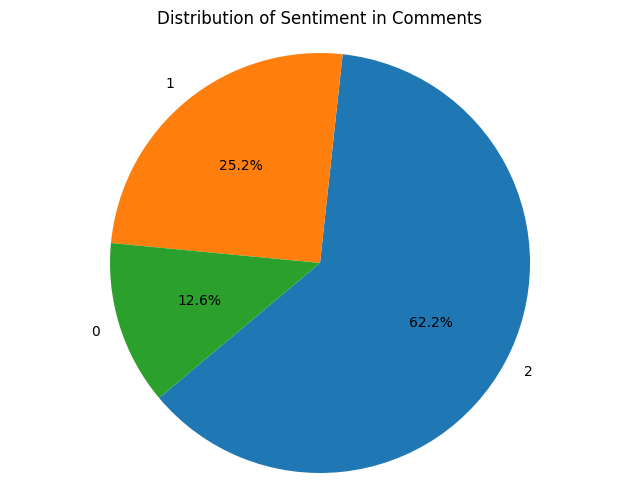

In [17]:
sentiment_counts = comment_sentiments["Sentiment"].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=220)
plt.title("Distribution of Sentiment in Comments")
plt.axis("equal")
plt.show()


Train-Test Split

In [18]:
train,test=train_test_split(comment_sentiments,test_size=0.2,random_state=10,stratify=comment_sentiments["Sentiment"])
print(train.shape,test.shape)

(14899, 2) (3725, 2)


In [19]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [20]:
def get_masks(text, max_length):
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length: tokens = tokens[:max_length]
    return np.asarray([1]*len(tokens) + [0] * (max_length - len(tokens)))


vec_get_masks = np.vectorize(get_masks, signature = '(),()->(n)')


def get_segments(text, max_length):
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length: tokens = tokens[:max_length]

    segments = []
    current_segment_id = 0
    with_tags = ["[CLS]"] + tokens + ["[SEP]"]
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]": current_segment_id = 1
    return np.asarray(segments + [0] * (max_length - len(tokens)))


vec_get_segments = np.vectorize(get_segments, signature = '(),()->(n)')


def get_ids(text, tokenizer, max_length):
    tokens = tokenizer.tokenize(text)
    tokens = ["[CLS]"] + tokens + ["[SEP]"]
    length = len(tokens)
    if length > max_length: tokens = tokens[:max_length]
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = np.asarray(token_ids + [0] * (max_length-length))
    return input_ids

vec_get_ids = np.vectorize(get_ids, signature = '(),(),()->(n)')


def prepare(text_array, tokenizer, max_length = 128):
    ids = vec_get_ids(text_array, tokenizer, max_length).squeeze()
    masks = vec_get_masks(text_array,max_length).squeeze()
    segments = vec_get_segments(text_array,max_length).squeeze()

    return ids, segments, masks

In [52]:
ids_train, segments_train, masks_train = prepare(train['Comment'], tokenizer)
ids_test, segments_test, masks_test = prepare(test['Comment'], tokenizer)

### Getting the pre-trained BERT model and freeze its layers except last one

In [44]:
input_word_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name='input_word_ids')
input_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name='input_mask')
segment_ids = tf.keras.Input(shape=(128,), dtype=tf.int32,name="segment_ids")

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

for layer in bert_model.layers:
    layer.trainable = False

for layer in bert_model.layers[-1:]:
    layer.trainable = True

x = bert_model([input_word_ids, input_mask, segment_ids])
x = x[0]
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[output])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 segment_ids (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_for_sequence_class  TFSequenceClassifierOutput   1094860   ['input_word_ids[0][0]',

Training the model with 500 comments cause of training & time limitations 

In [46]:
train["Sentiment"] = train["Sentiment"].astype(float)

num_rows_to_select = 500

random_indices = np.random.choice(len(train), size=num_rows_to_select, replace=False)
selected_rows = train.iloc[random_indices]
ids_train = ids_train[random_indices]
masks_train = masks_train[random_indices]
segments_train = segments_train[random_indices]


In [47]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoint', save_best_only=True, monitor='val_loss', mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.History()
]

In [48]:
history = model.fit([ids_train, masks_train, segments_train],
          selected_rows.Sentiment,
          epochs = 20,
          batch_size = 16,
          validation_split = 0.2,
          callbacks = callbacks)

Epoch 1/20
25/25 [==============================] - 506s 20s/step - loss: 1.1547 - accuracy: 0.2300 - val_loss: 1.1099 - val_accuracy: 0.2300
Epoch 2/20
25/25 [==============================] - 339s 14s/step - loss: 1.0934 - accuracy: 0.4075 - val_loss: 1.0550 - val_accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 379s 16s/step - loss: 1.0379 - accuracy: 0.5425 - val_loss: 1.0182 - val_accuracy: 0.5600
Epoch 4/20
25/25 [==============================] - 384s 16s/step - loss: 0.9891 - accuracy: 0.6175 - val_loss: 0.9921 - val_accuracy: 0.5900
Epoch 5/20
25/25 [==============================] - 339s 14s/step - loss: 0.9570 - accuracy: 0.6150 - val_loss: 0.9753 - val_accuracy: 0.5900
Epoch 6/20
25/25 [==============================] - 385s 16s/step - loss: 0.9432 - accuracy: 0.6150 - val_loss: 0.9642 - val_accuracy: 0.6000
Epoch 7/20
25/25 [==============================] - 386s 16s/step - loss: 0.9317 - accuracy: 0.5950 - val_loss: 0.9589 - val_accuracy: 0.6000
Epoch 

In [53]:
test["Sentiment"] = test["Sentiment"].astype(float)

num_rows_to_select = 100

random_indices = np.random.choice(len(test), size=num_rows_to_select, replace=False)
selected_rows = test.iloc[random_indices]
ids_test = ids_test[random_indices]
masks_test = masks_test[random_indices]
segments_test = segments_test[random_indices]



In [54]:
model.evaluate([ids_test, masks_test, segments_test], selected_rows["Sentiment"])

4/4 [==============================] - 43s 10s/step - loss: 0.8746 - accuracy: 0.6200


[0.874630868434906, 0.6200000047683716]

In [56]:
y_pred = model.predict([ids_test, masks_test, segments_test])

y_pred_bool = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_pred_bool, selected_rows["Sentiment"]))

4/4 [==============================] - 66s 14s/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.62      0.77       100

    accuracy                           0.62       100
   macro avg       0.33      0.21      0.26       100
weighted avg       1.00      0.62      0.77       100



The model has 62% accuracy, but it predicted all comments as positive, so this model has failed on our task :(